### This note explore the public open source employee demographic dataset from Arlington County, where I ask exploratory questions and visualize through data visualization packages  `matplot`, `pandas`,  `seaborn`
1. "What is the distribution of employees by sex and race?"
2. "How does employee count vary by race and sex?"
3. "What is the range of employee start years, and how are they distributed?"
4. "What are the racial demographics of the most common job roles?"

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
demographic_df = pd.read_csv('Data Source/Employee+Demographics.csv')
demographic_df.head()

,JobTitle,Sex,Race,JobType,StartYear
0,Management Specialist,M,White,Permanent-Full Time,2000
1,Fire/EMS Lieutenant,M,White,Permanent-Full Time,1996
2,Police Corporal,F,White,Permanent-Full Time,2004
3,Police Chief,M,White,Permanent-Full Time,1990
4,Firefighter/EMT II,M,White,Permanent-Full Time,2003


In [146]:
demographic_df.describe()

,StartYear
count,3608.000000
mean,2007.260809
std,8.943149
min,1969.000000
25%,2001.000000
50%,2009.000000
75%,2015.000000
max,2018.000000


In [147]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   3608 non-null   object
 1   Sex        3608 non-null   object
 2   Race       3608 non-null   object
 3   JobType    3608 non-null   object
 4   StartYear  3608 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 141.1+ KB


In [148]:
demographic_df.columns

Index(['JobTitle', 'Sex', 'Race', 'JobType', 'StartYear'], dtype='object')

In [149]:
demographic_df.columns = ['job_title','sex','race','job_type','start_year']

#### Sex and race distribution

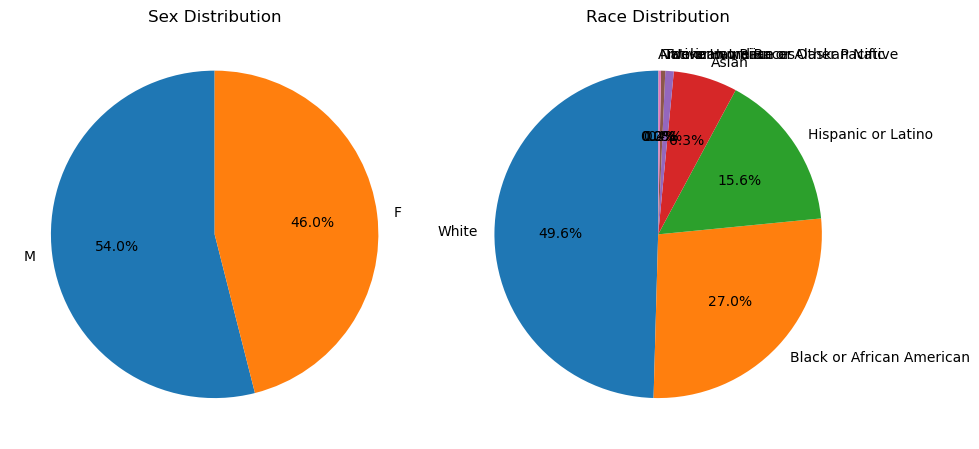

In [ ]:
total = len(demographic_df)

race_ct = demographic_df['race'].value_counts()
race_ptgs = round((race_ct/total) * 100,2)

sex_counts = demographic_df['sex'].value_counts()
sex_percentages = round((sex_counts / total) * 100,2)

fig, ax = plt.subplots(1,2,figsize = (10,20))
ax[0].pie(
    sex_percentages.values,
    labels=sex_percentages.index,          
    autopct='%1.1f%%',                 
    startangle=90                           
)
ax[1].pie(
    race_ptgs.values,                     
    labels=race_ptgs.index,             
    autopct='%1.1f%%',                
    startangle=90                   
)

ax[0].set_title('Sex Distribution')
ax[1].set_title('Race Distribution')
plt.tight_layout()
plt.show()

#### Employee count by race and sex

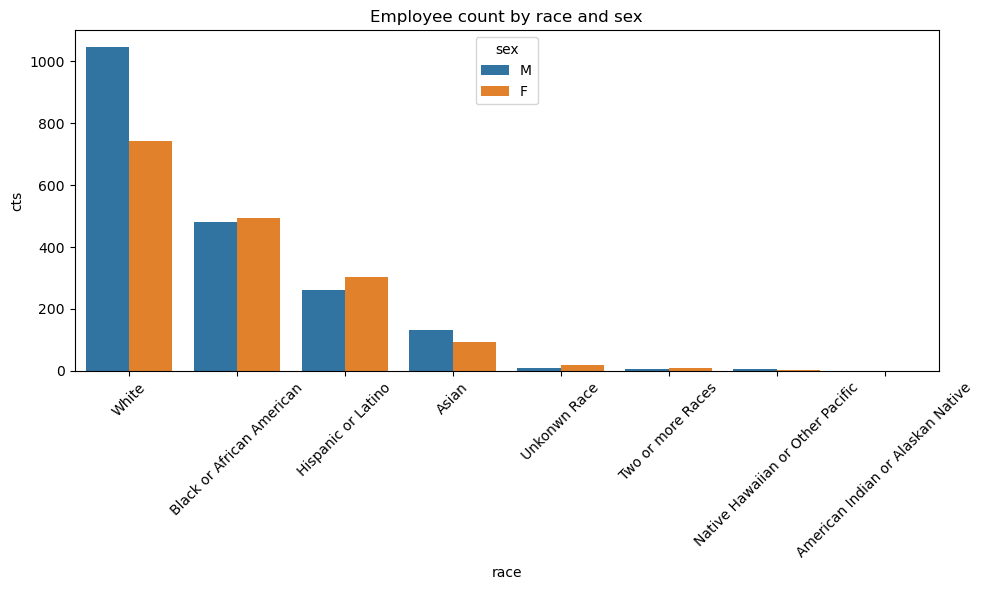

In [171]:
import seaborn as sns

race_sex_cts = demographic_df.groupby(['race','sex']).size().reset_index(name='cts').sort_values(by='cts',ascending= False)

plt.figure(figsize=(10,6))
sns.barplot(x=race_sex_cts.race, y= race_sex_cts.cts, hue=race_sex_cts.sex)
plt.title('Employee count by race and sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Employee start year between

Text(0.5, 1.0, 'Employee Start Year Between')

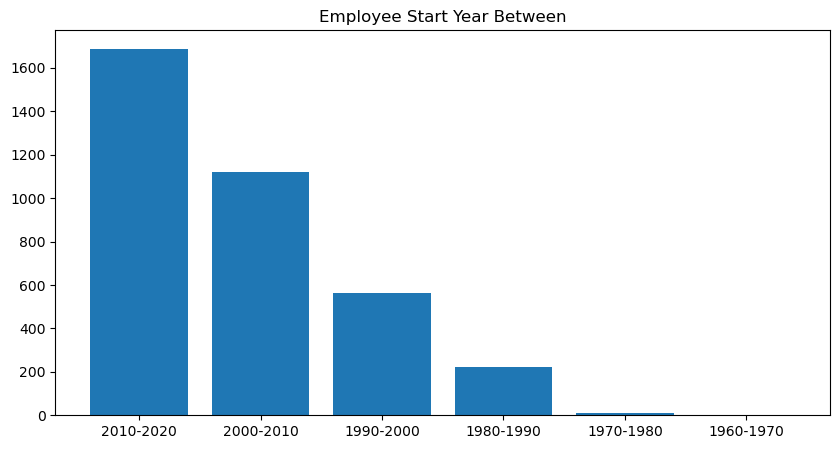

In [ ]:
import math
min_year = math.floor(demographic_df.start_year.min() / 10) * 10
max_year= math.ceil(demographic_df.start_year.max()/ 10)  * 10
bin = list(range(min_year, max_year+ 10,10))
year_label = ['1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2020']


demographic_df['start_yr_range'] = pd.cut(demographic_df['start_year'], bins=bin, labels=year_label)
start_year_cts = demographic_df['start_yr_range'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(start_year_cts.index, start_year_cts.values)
plt.title('Employee Start Year Between')

#### Race percentage of most common jobs

<Axes: title={'center': 'Race Percentage of Most Common Jobs'}, xlabel='job_title'>

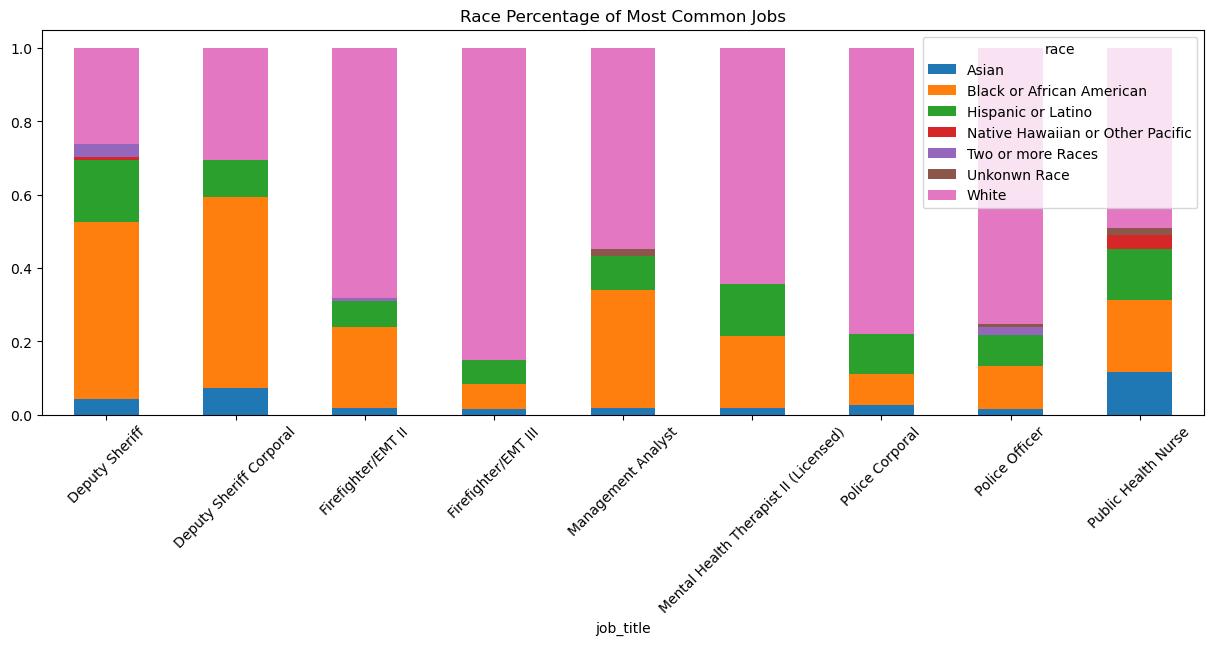

In [172]:
common_jobs = demographic_df.groupby('job_title').size().reset_index(name='count').sort_values(by='count',ascending=False)[:9]
common_job_df = demographic_df[demographic_df['job_title'].isin(common_jobs['job_title'])]

common_job_race_ct = common_job_df.groupby(['job_title','race']).size().reset_index(name='count').pivot(
    columns='race',
    values='count',
    index='job_title'
).fillna(0)
common_job_race_ct['total'] = common_job_race_ct.sum(axis=1)
common_job_df_ct_pct = common_job_race_ct.div(common_job_race_ct['total'],axis=0).drop(columns = ['total'])
common_job_df_ct_pct.plot(kind='bar', stacked = True, figsize=(15,5),rot=45,title='Race Percentage of Most Common Jobs')